# **Predizendo notas IMDB através da Mineração de Dados e de Algoritmos Regressores**

### Alunos:
- Eduardo Amaral - NUSP 11735021
- Otto Fernandes - NUSP 11275130
- Gabriela Prado - NUSP 11892917
- Laís Deghaide - NUSP 11369767


## Introdução
1. Contextualização:
> Um filme de sucesso não apenas entretém o público, mas também permite que as empresas cinematográficas obtenham lucros tremendos. Muitos fatores como bons diretores, atores experientes são consideráveis para criar bons filmes. No entanto, por mais que diretores e atores famosos possam trazer uma boa receita de bilheteria e/ou uma obra aclamada pela crítica, nem sempre esse é o caso. Questiona-se então, quais os fatores resultam em uma obra bem avaliada pela crítica.

2. Descrição da base de dados:
> O conjunto de dados foi obtido no [Kaggle](https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset). Ele contém 28 variáveis para 5.043 filmes, abrangendo 100 anos em 66 países. Existem 2399 nomes de diretores únicos e milhares de atores/atrizes. “imdb_score” é a variável de resposta enquanto as outras 27 variáveis são possíveis preditores.

3. Problema que resolveremos neste trabalho:
> Com base nas informações dos filmes, deseja-se entender quais são os fatores importantes que tornam um filme mais bem-sucedido do que outros. Então, analisa-se que tipo de filme faz mais sucesso, ou seja, obtém maior pontuação no IMDB. Também tem-se como objetivo mostrar os resultados dessa análise de maneira intuitiva, de modo a visualizar o resultado.
> Neste projeto, as pontuações do IMDB são tomadas como variável de resposta e tem-se como foco as previsões operacionais obtidas a partir da análise do restante das variáveis da base de dados.
> Também é desejado analisar os resultados de diferentes modelos regressores de modo a identificar qual obtém os melhores resultados para a base em questão.



#Obtendo os dados

Os dados são baixados de um espelho em um [repositório do GitHub](https://github.com/rolimans/imdbScorePredictor) e são movidos para o diretório `data`.

In [ ]:
!rm -r data
!wget https://raw.githubusercontent.com/rolimans/imdbScorePredictor/main/data/movieData.csv
!mkdir data
!mv movieData.csv data/

--2022-12-08 01:37:38--  https://raw.githubusercontent.com/rolimans/imdbScorePredictor/main/data/movieData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1494688 (1.4M) [text/plain]
Saving to: ‘movieData.csv’

movieData.csv       100%[===================>]   1.42M  --.-KB/s    in 0.04s   

2022-12-08 01:37:38 (38.8 MB/s) - ‘movieData.csv’ saved [1494688/1494688]



## Importando as bibliotecas necessárioas

Importa-se as bibliotecas necessárias para o desenvolvimento do projeto.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import (LinearRegression, HuberRegressor, RANSACRegressor, TheilSenRegressor, Ridge, Lasso, ElasticNet)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  cross_validate
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array


## Exploração dos dados

Os dados presentes no arquivo CSV são carregados para o DataFrame e realiza-se uma análise inicial dos mesmos

As colunas dos dados representam as seguintes informações:

| Coluna | Descrição|
| --- | --- |
| movie_title | Título do filme |
| duration | Duração em minutos |
| director_name | Nome do diretor |
| director_facebook_likes | Quantidade de likes da página do diretor no Facebook |
| actor_1_name | Nome do ator principal |
| actor_1_facebook_likes | Quantidade de likes da página do ator principal no Facebook |
| actor_2_name | Nome de outro ator |
| actor_2_facebook_likes | Quantidade de likes da página do outro ator no Facebook |
| actor_3_name | Nome de outro ator |
| actor_3_facebook_likes | Quantidade de likes da página do outro ator no Facebook |
| num_user_for_reviews | Número de usuários que revisaram o filme |
| num_critic_for_reviews | Número de reviews críticas no IMDB |
| num_voted_users | Número de pessoas que votaram no filme |
| cast_total_facebook_likes | Número de likes totais do elenco no Facebook |
| movie_facebook_likes | Número de likes da página do filme no facebook |
| plot_keywords | Palavras-chave descrevendo o enredo |
| facenumber_in_poster | Número do ator que aparece no pôster do filme |
| color | Cor do filme. Colorido ou Preto e Branco |
|genres |  Gêneros do filme |
| title_year | Ano de lançamento do filme. De 1916-2016 |
| language | Idioma principal do filme. |
| country | País de produção do filme |
| content_rating | Classificação indicativa do filme |
| aspect_ratio | Proporção da tela que o filme foi feito |
| movie_imdb_link | Link do filme no IMDB |
| gross | Ganho bruto do filme em Dólares |
| budget | Orçamento do filme em Dólares |
| imdb_score | Pontuação IMDB do filme |

In [ ]:
# Lê os dados de um CSV para o DataFrame
rawDf = pd.read_csv("data/movieData.csv")

display(rawDf)

print(rawDf.info())

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

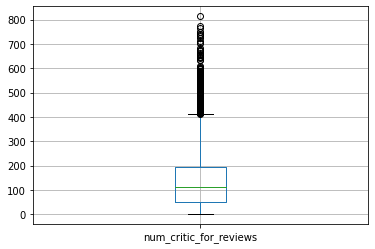

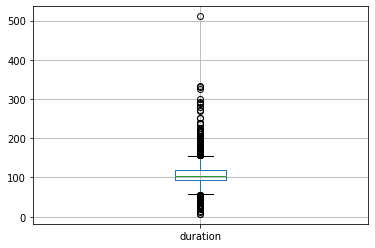

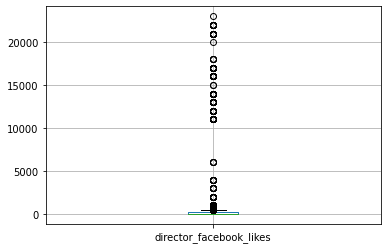

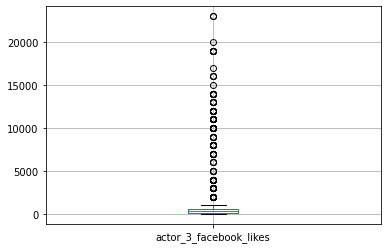

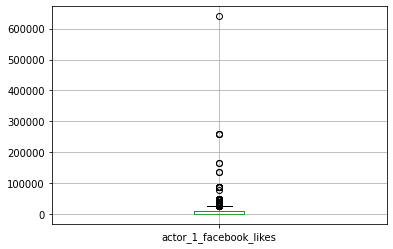

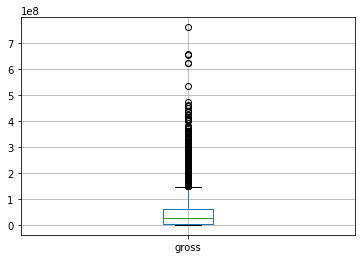

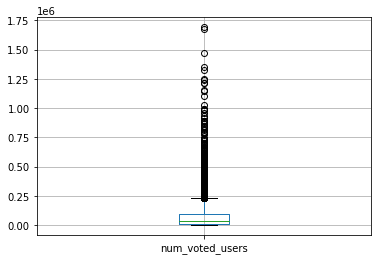

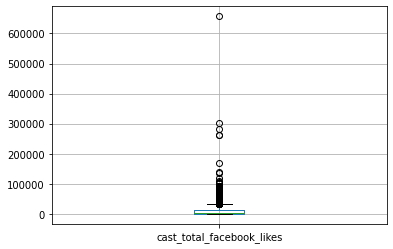

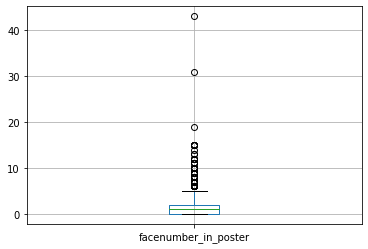

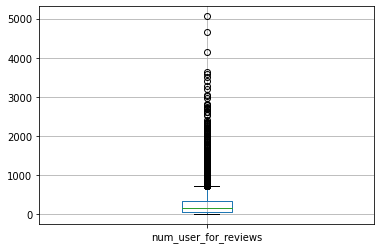

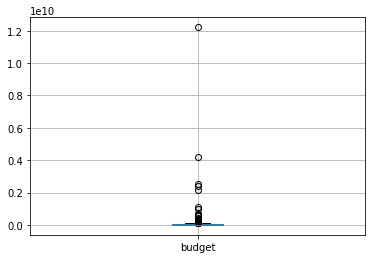

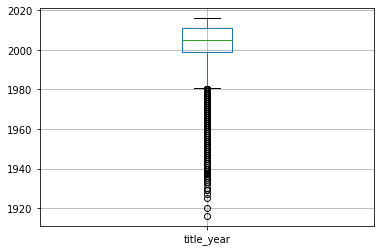

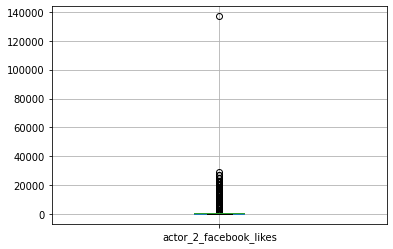

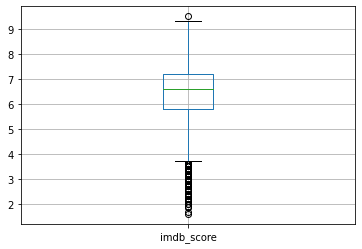

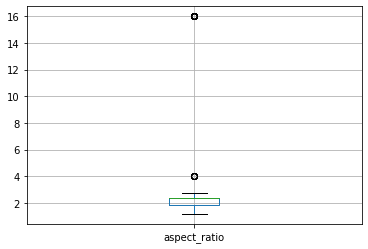

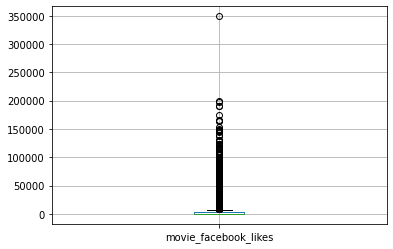

In [ ]:
for column in rawDf.select_dtypes(include=np.number).columns.tolist():
    plt.figure()
    rawDf.boxplot([column])

In [ ]:
rawDf.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


## Remoção de Duplicatas

In [ ]:
nDuplicates = len(rawDf) - len(rawDf.drop_duplicates())

print(f'Número de duplicatas: {nDuplicates}')

df = rawDf.drop_duplicates().reset_index().drop(['index'],axis=1)

Número de duplicatas: 45


## Análise de Gêneros

Cada linha da coluna de gênero possui os gêneros do filme separados por '|', exemplo: Action|Adventure|Fantasy.

Deseja-se saber se o gênero está relacionado à pontuação do IMDB. Divide-se a string em várias substrings pelo separador '|' e salva-se cada substring em uma array de gêneros.

Em seguida mapeia-se os gêneros em colunas em que o valor da coluna é 1 caso o filme possua o gênero referente a coluna e 0 caso contrário. Tal processo é feito por meio do OneHot Encoding.

Por fim, traça-se um histograma com a média da nota de cada gênero com o intuito de observar a relação entre gênero e score.

In [ ]:
movieGenres = df[['genres', 'imdb_score']].copy()

display(movieGenres)

movieGenres['genres'] = movieGenres['genres'].apply(lambda x: x.split('|'))

oneHotEncodedGenres = pd.get_dummies(pd.DataFrame(movieGenres.pop('genres').values.tolist()), prefix='', prefix_sep='').groupby(axis=1, level=0).max()

movieGenres = pd.concat([movieGenres,oneHotEncodedGenres],axis=1)

display(movieGenres)

genres = movieGenres.columns.drop('imdb_score').to_list()

genresScoreMean = {}

for genre in genres:
  genresScoreMean[genre] = movieGenres[movieGenres[genre]==1]['imdb_score'].mean()

fig = px.bar(x=list(genresScoreMean.keys()), y=list(genresScoreMean.values()), title='Média de Notas por Gênero', labels={'x':'Gênero', 'y':'Média de Notas'})

fig.show()


,genres,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Action|Adventure|Fantasy,7.1
2,Action|Adventure|Thriller,6.8
3,Action|Thriller,8.5
4,Documentary,7.1
...,...,...
4993,Comedy|Drama,7.7
4994,Crime|Drama|Mystery|Thriller,7.5
4995,Drama|Horror|Thriller,6.3
4996,Comedy|Drama|Romance,6.3


,imdb_score,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,7.9,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7.1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.8,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,7.1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,7.7,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4994,7.5,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4995,6.3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4996,6.3,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


Verifica-se que os únicos gêneros com médias destoantes são Game-Show e Reality-TV com médias de 2.9 e 4.75 respectivamente. Os demais gêneros possuem médias entre 6 e 8.

Como as médias da maior parte dos gêneros são próximas, não há uma relação clara entre tais gêneros e a pontuação do IMDB. Por esse motivo mantém-se apenas as informações sobre os gêneros destoantes.

In [ ]:
df = df.drop('genres', axis=1)

movieGenres = movieGenres[['Game-Show','Reality-TV']]

df = pd.concat([df, movieGenres], axis=1)

df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Game-Show,Reality-TV
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Eric Mabius,...,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,0,0
4994,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Natalie Zea,...,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,0,0
4995,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Eva Boehnke,...,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,0,0
4996,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,...,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,0,0


## Limpeza dos dados

### Valores faltantes

Verifica-se a quantidade de valores faltantes em cada coluna.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

gross                        874
budget                       487
aspect_ratio                 327
content_rating               301
plot_keywords                152
title_year                   107
director_facebook_likes      103
director_name                103
num_critic_for_reviews        49
actor_3_facebook_likes        23
actor_3_name                  23
num_user_for_reviews          21
color                         19
duration                      15
actor_2_facebook_likes        13
facenumber_in_poster          13
actor_2_name                  13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_imdb_link                0
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
imdb_score                     0
movie_facebook_likes           0
Game-Show                      0
Reality-TV                     0
dtype: int64

In [ ]:
fig = px.imshow(df.isnull(), title='Valores Nulos', labels={'x':'Colunas', 'y':'Index'})

fig.show()

### Remoção de linhas com valores faltantes

Como as colunas 'gross' e 'budget' têm muitos valores faltando e deseja-se mantê-las para uma anaálise futura, remove-se as linhas com valores nulos.



In [ ]:
rowsBefore = df.shape[0]

df = df[df['gross'].notna()].copy()
df = df[df['budget'].notna()].copy()

rowsAfter = df.shape[0]

rowsRemoved = rowsBefore - rowsAfter

percentRemoved = (rowsRemoved/rowsBefore)*100

print(f'Linhas removidas: {rowsRemoved} ({percentRemoved:.2f}%)')

df.shape

Linhas removidas: 1141 (22.83%)


(3857, 29)

## Análise de Aspect Ratio

A coluna que possui o maior numero de valores faltantes agora é a 'aspect_ratio'.

Antes de decidir o que fazer com os valores faltantes, analisa-se a relação entre o aspect ratio e a pontuação do IMDB.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

aspect_ratio                 74
content_rating               51
plot_keywords                31
actor_3_name                 10
actor_3_facebook_likes       10
facenumber_in_poster          6
actor_2_facebook_likes        5
actor_2_name                  5
actor_1_facebook_likes        3
language                      3
actor_1_name                  3
color                         2
num_critic_for_reviews        1
duration                      1
cast_total_facebook_likes     0
budget                        0
Game-Show                     0
movie_facebook_likes          0
imdb_score                    0
title_year                    0
director_facebook_likes       0
num_voted_users               0
country                       0
gross                         0
num_user_for_reviews          0
movie_imdb_link               0
movie_title                   0
director_name                 0
Reality-TV                    0
dtype: int64

In [ ]:
df['aspect_ratio'].value_counts()

2.35     1995
1.85     1600
1.37       50
1.78       41
1.66       40
1.33       19
2.39       11
2.20       10
2.00        3
2.40        3
2.76        3
1.75        2
1.18        1
2.55        1
1.77        1
1.50        1
2.24        1
16.00       1
Name: aspect_ratio, dtype: int64

Os valores mais comuns de aspect ratio são 2.35 e 1.85. Com o objetivo de simplificar a análise, agrupa-se os valores de aspect ratio em 3 categorias: 2.35, 1.85 e outros. Para calcular as médias de acordo com o aspect ratio, substitui-se os valores faltantes de aspect ratio por 0 temporariamente.

In [ ]:
df['aspect_ratio'] = df['aspect_ratio'].fillna(0)

In [ ]:
mean = df['imdb_score'][df['aspect_ratio']==2.35].mean()

print(f'Média de notas para filmes com aspect ratio 2.35: {mean:.2f}')

Média de notas para filmes com aspect ratio 2.35: 6.51


In [ ]:
mean = df['imdb_score'][df['aspect_ratio']==1.85].mean()

print(f'Média de notas para filmes com aspect ratio 1.85: {mean:.2f}')

Média de notas para filmes com aspect ratio 1.85: 6.37


In [ ]:
mean = df['imdb_score'][(df['aspect_ratio']!=2.35) & (df['aspect_ratio']!=1.85)].mean()

print(f'Média de notas para filmes com aspect ratio diferente de 2.35 e 1.85: {mean:.2f}')

Média de notas para filmes com aspect ratio diferente de 2.35 e 1.85: 6.67


Verifica-se que a média de notas do IMDB não varia muito de acordo com o aspect ratio. Os valores para os diferentes tipos de aspect ratio ficam entre 6.37 e 6.67. Por esse motivo elimina-se a coluna 'aspect_ratio'.

In [ ]:
df = df.drop('aspect_ratio', axis=1)

df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Game-Show,Reality-TV
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Shane Carruth,...,English,USA,PG-13,7000.0,2004.0,45.0,7.0,19000,0,0
4989,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Ian Gamazon,...,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,74,0,0
4990,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Carlos Gallardo,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,0,0,0
4992,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Kerry Bishé,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,413,0,0


### Lidando com 0s

Nota-se que existem alguns valores 0 que também devem ser considerados como valor ausente, exceto para a coluna 'facenumber_in_poster'.

Primeiramente, substitui-se os valores faltantes da coluna 'facenumber_in_poster' pela média da coluna.
Em seguida, substitui-se os valores 0 das colunas restantes por NaN e por fim substitui-se os NaN pela média da coluna.


In [ ]:
df['facenumber_in_poster'] = df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].mean())

In [ ]:
numericColumns = df.select_dtypes(include=np.number).columns.drop(['Game-Show','Reality-TV', 'facenumber_in_poster'])

df[numericColumns] = df[numericColumns].replace(0, np.nan)

df[numericColumns] = df[numericColumns].fillna(df[numericColumns].mean())

## Análise da Classificação Indicativa

Ainda existem valores faltantes na coluna 'content_rating'. Removem-se as linhas com valores faltantes e agrupa-se algumas classificações tidas como equivalentes.

In [ ]:
df['content_rating'].value_counts()

R            1723
PG-13        1314
PG            573
G              91
Not Rated      42
Unrated        24
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [ ]:
# Remove-se linhas com valores nulos em content_rating

df = df[df['content_rating'].notna()].copy()

In [ ]:
# Agrupa-se algumas classificações indicativas equivalentes

replaceMap = {
    'M': 'PG',
    'GP': 'PG',
    'X': 'NC-17',
    'Approved': 'R',
    'Passed': 'R',
    'Not Rated': 'R',
    'Unrated': 'R',
}


df['content_rating'] = df['content_rating'].apply(lambda x: replaceMap.get(x, x))

df['content_rating'].value_counts()

R        1809
PG-13    1314
PG        576
G          91
NC-17      16
Name: content_rating, dtype: int64

## Adição de novas colunas

Visando uma análise mais detalhada, adiciona-se novas colunas com informações sobre o lucro e o retorno do investimento a partir dos valores de 'gross' e 'budget'.

In [ ]:
df['profit'] = df['gross'] - df['budget']
df['return_on_investment'] = df['profit'] / df['budget'] * 100

df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Game-Show,Reality-TV,profit,return_on_investment
0,Color,James Cameron,723.0,178.0,949.375628,855.00000,Joel David Moore,1000.000000,760505847.0,CCH Pounder,...,PG-13,237000000.0,2009.0,936.000000,7.9,33000.000000,0,0,523505847.0,220.888543
1,Color,Gore Verbinski,302.0,169.0,563.000000,1000.00000,Orlando Bloom,40000.000000,309404152.0,Johnny Depp,...,PG-13,300000000.0,2007.0,5000.000000,7.1,16719.617661,0,0,9404152.0,3.134717
2,Color,Sam Mendes,602.0,148.0,949.375628,161.00000,Rory Kinnear,11000.000000,200074175.0,Christoph Waltz,...,PG-13,245000000.0,2015.0,393.000000,6.8,85000.000000,0,0,-44925825.0,-18.337071
3,Color,Christopher Nolan,813.0,164.0,22000.000000,23000.00000,Christian Bale,27000.000000,448130642.0,Tom Hardy,...,PG-13,250000000.0,2012.0,23000.000000,8.5,164000.000000,0,0,198130642.0,79.252257
5,Color,Andrew Stanton,462.0,132.0,475.000000,530.00000,Samantha Morton,640.000000,73058679.0,Daryl Sabara,...,PG-13,263700000.0,2012.0,632.000000,6.6,24000.000000,0,0,-190641321.0,-72.294775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,Color,Shane Carruth,143.0,77.0,291.000000,8.00000,David Sullivan,291.000000,424760.0,Shane Carruth,...,PG-13,7000.0,2004.0,45.000000,7.0,19000.000000,0,0,417760.0,5968.000000
4989,Color,Neill Dela Llana,35.0,80.0,949.375628,754.94354,Edgar Tancangco,7589.347374,70071.0,Ian Gamazon,...,R,7000.0,2005.0,1970.271279,6.3,74.000000,0,0,63071.0,901.014286
4990,Color,Robert Rodriguez,56.0,81.0,949.375628,6.00000,Peter Marquardt,121.000000,2040920.0,Carlos Gallardo,...,R,7000.0,1992.0,20.000000,6.9,16719.617661,0,0,2033920.0,29056.000000
4992,Color,Edward Burns,14.0,95.0,949.375628,133.00000,Caitlin FitzGerald,296.000000,4584.0,Kerry Bishé,...,R,9000.0,2011.0,205.000000,6.4,413.000000,0,0,-4416.0,-49.066667


## Remoção de colunas pouco relevantes

## Análise de Cor

In [ ]:
df['color'].value_counts()

coloredCount = df['color'].value_counts()['Color']
blackAndWhiteCount = df['color'].value_counts()[' Black and White']

print(f'Percentual de filmes coloridos: {coloredCount/(coloredCount+blackAndWhiteCount)*100:.2f}%')


Percentual de filmes coloridos: 96.74%


Como a grande maioria dos filmes possui cor, tal coluna é quase constante e não possui muita relevância para a análise. Por esse motivo, remove-se a coluna 'color'.

In [ ]:
df = df.drop('color', axis=1)

## Análise de Idioma e País

In [ ]:
df['language'].value_counts()

englishCount = df['language'].value_counts()['English']

print(f'Percentual de filmes em inglês: {englishCount/len(df)*100:.2f}%')

Percentual de filmes em inglês: 95.74%


Novamente temos uma coluna com valores quase constantes. Por esse motivo, remove-se a coluna 'language'.

In [ ]:
df = df.drop('language', axis=1)

In [ ]:
df['country'].value_counts().apply(lambda x: str(x/len(df)*100)[:5] + '%')

USA               79.47%
UK                8.302%
France            2.706%
Germany           2.075%
Canada            1.655%
Australia         1.050%
Spain             0.578%
Japan             0.394%
China             0.341%
Hong Kong         0.341%
New Zealand       0.289%
Italy             0.289%
Mexico            0.262%
Denmark           0.236%
South Korea       0.210%
Ireland           0.183%
Brazil            0.131%
India             0.131%
Norway            0.105%
Iran              0.105%
Thailand          0.105%
South Africa      0.078%
Argentina         0.078%
Netherlands       0.078%
Czech Republic    0.078%
Russia            0.078%
Taiwan            0.052%
Israel            0.052%
Hungary           0.052%
Romania           0.052%
Official site     0.026%
Iceland           0.026%
Afghanistan       0.026%
Indonesia         0.026%
New Line          0.026%
Poland            0.026%
Colombia          0.026%
Peru              0.026%
Aruba             0.026%
Greece            0.026%


Verifica-se que aproximadamente 79% dos filmes são estadunidenses, 8% são britânicos e o restante são de outros países. Por esse motivo, agrupa-se os filmes em 3 categorias: estadunidense, britânico e outros.

In [ ]:
df['country'] = df['country'].apply(lambda x: 'Others' if x not in ['USA', 'UK'] else x)

df['country'].value_counts()


USA       3025
Others     465
UK         316
Name: country, dtype: int64

## Visualização dos dados

Gera-se alguns gráficos em busca de entender melhor os dados.

### Produção de filmes por ano

In [ ]:
# Histograma de filmes por ano

fig = px.histogram(df, x='title_year', title='Filmes por Ano', labels={'title_year':'Ano de Lançamento'}).update_layout(yaxis_title='Quantidade de Filmes')

fig.show()

A partir do histograma nota-se que poucos filmes foram produzidos antes de 1980, por isso, remove-se as linhas com ano de produção menor que 1980.

In [ ]:
df = df[df['title_year']>=1980].copy()

### Top 20 filmes mais rentáveis

In [ ]:

mostProfitableMovies = df.sort_values(by='profit', ascending=False).head(20)

fig = px.scatter(mostProfitableMovies, x='budget', y='profit', text='movie_title', title='Filmes Mais Rentáveis', labels={'budget':'Orçamento', 'profit':'Lucro', 'movie_title': 'Título'}).update_traces(textposition='top center', textfont_size=10)

fig.show()


### Top 20 filmes com maior retorno do investimento

In [ ]:

mostROIMovies = df.sort_values(by='return_on_investment', ascending=False).head(20)

fig = px.scatter(mostROIMovies, x='budget', y='return_on_investment', text='movie_title', title='Filmes com maior ROI', labels={'budget':'Orçamento', 'return_on_investment':'Retorno sobre o Investimento', 'movie_title': 'Título'}).update_traces(textposition='top center', textfont_size=10)


fig.show()


### Top 20 diretores por score do IMDB

In [ ]:
topDirectors = df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(20)

pd.DataFrame(topDirectors).reset_index().rename(columns={'imdb_score':'Média de Notas', 'director_name':'Diretor'})

,Diretor,Média de Notas
0,Tony Kaye,8.600000
1,Ron Fricke,8.500000
2,Damien Chazelle,8.500000
3,Majid Majidi,8.500000
4,Christopher Nolan,8.425000
5,Asghar Farhadi,8.400000
6,Sergio Leone,8.400000
7,Marius A. Markevicius,8.400000
8,Richard Marquand,8.400000
9,Lenny Abrahamson,8.300000


### Sucesso Comercial vs Sucesso Crítico

In [ ]:
mostProfitable = df.sort_values(by='profit', ascending=False).head(20)

fig = px.scatter(mostProfitable, x='imdb_score', y='gross', text='movie_title', size='profit', color='content_rating', title='Sucesso Comercial vs Sucesso Crítico', labels={'imdb_score':'Nota no IMDB', 'gross':'Bilheteria', 'profit':'Lucro', 'content_rating':'Classificação Indicativa', 'movie_title': 'Título'}).update_traces(textposition='top center', textfont_size=10)

fig.show()


### Sucesso nas mídias sociais vs Sucesso Crítico

In [ ]:
fig = px.scatter(df, x="movie_facebook_likes", y="imdb_score", color="content_rating", hover_name="movie_title", title='Sucesso no Facebook vs Sucesso Crítico', labels={'movie_facebook_likes':'Likes no Facebook', 'imdb_score':'Nota no IMDB', 'content_rating':'Classificação Indicativa', 'movie_title': 'Título'})

fig.show()

## Predição do Score IMDB através de algoritmos de regressão

Inicia-se removendo os poucos valores faltantes restantes



In [ ]:
df = df.dropna()

Em seguida remove-se as colunas lucro e ROI inseridas artificialmente para análise visual. Tais colunas foram geradas a partir de 'gross' e 'budget', logo possuem grande correlação com suas geradoras

In [ ]:
df = df.drop(['profit','return_on_investment'], axis=1)

Remove-se as colunas com valores únicos como Título e URL da página no IMDB. Os títulos são salvos para uma análise posterior

In [ ]:
movieTitles =  df.pop('movie_title')

df = df.drop(['movie_imdb_link'], axis=1)

Os atores são unidos em arrays, bem como as palavras chaves são separadas pelo delimitador '|' e salvas em uma array.

Utiliza-se o OneHot Encoding para mapear as variáveis categóricas para colunas de 1 e 0.

Introduz-se um grande número de colunas aos dados. Tal problema deve ser sanado por meio de redução de dimensionalidade posteriormente.

In [ ]:
def oneHot(df, col):
  oHot = pd.get_dummies(df[col], prefix='', prefix_sep='')
  df = df.drop(col, axis=1)
  df = pd.concat([df.reset_index().drop('index',axis=1),oHot],axis=1)
  return df

def multiOneHot(df, col):
  oHot = pd.get_dummies(pd.DataFrame(df.pop(col).values.tolist()), prefix='', prefix_sep='').groupby(axis=1, level=0).max()
  df = pd.concat([df.reset_index().drop('index',axis=1),oHot],axis=1)
  return df

df['actors'] = df.apply(lambda row: [row['actor_1_name']+"_act",row['actor_2_name']+"_act",row['actor_3_name']+"_act"], axis=1)

df = df.drop(['actor_1_name','actor_2_name','actor_3_name'], axis=1)

df['plot_keywords'] = df['plot_keywords'].apply(lambda x : [plt+'_plt' for plt in x.split('|')])

df['director_name'] = df['director_name'].apply(lambda x : x + '_dir')

df = multiOneHot(df,'plot_keywords')

df = multiOneHot(df,'actors')

df = oneHot(df, 'content_rating')

df = oneHot(df, 'country')

df = oneHot(df, 'director_name')


In [ ]:
df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,Yarrow Cheney_dir,Yash Chopra_dir,Yimou Zhang_dir,Zach Braff_dir,Zach Cregger_dir,Zack Snyder_dir,Zak Penn_dir,Zal Batmanglij_dir,Álex de la Iglesia_dir,Émile Gaudreault_dir
0,723.0,178.0,949.375628,855.00000,1000.000000,760505847.0,886204,4834.000000,0.0,3054.0,...,0,0,0,0,0,0,0,0,0,0
1,302.0,169.0,563.000000,1000.00000,40000.000000,309404152.0,471220,48350.000000,0.0,1238.0,...,0,0,0,0,0,0,0,0,0,0
2,602.0,148.0,949.375628,161.00000,11000.000000,200074175.0,275868,11700.000000,1.0,994.0,...,0,0,0,0,0,0,0,0,0,0
3,813.0,164.0,22000.000000,23000.00000,27000.000000,448130642.0,1144337,106759.000000,0.0,2701.0,...,0,0,0,0,0,0,0,0,0,0
4,462.0,132.0,475.000000,530.00000,640.000000,73058679.0,212204,1873.000000,1.0,738.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,143.0,77.0,291.000000,8.00000,291.000000,424760.0,72639,368.000000,0.0,371.0,...,0,0,0,0,0,0,0,0,0,0
3682,35.0,80.0,949.375628,754.94354,7589.347374,70071.0,589,11259.937598,0.0,35.0,...,0,0,0,0,0,0,0,0,0,0
3683,56.0,81.0,949.375628,6.00000,121.000000,2040920.0,52055,147.000000,0.0,130.0,...,0,0,0,0,0,0,0,0,0,0
3684,14.0,95.0,949.375628,133.00000,296.000000,4584.0,1338,690.000000,1.0,14.0,...,0,0,0,0,0,0,0,0,0,0


Separa-se os dados em dois grupos:

- Features (X)
- Alvo (y)

In [ ]:
imdb_score = df.pop('imdb_score')

X = df.values
y = imdb_score.values

Cria-se um novo transformador que trunca as colunas pouco correlacionadas com o alvo.
Tal processo inicia-se pelo cálculo da matriz de correlação dos atributos, posteriormente remove-se os atributos fracamente correlacionados ao score IMDB (Correlação < `minCorrelation`)

In [ ]:
class CorrelationTruncator(BaseEstimator, TransformerMixin):
    def __init__(self, minCorrelation):
        self.minCorrelation = minCorrelation
        self.corrMatrix = None
        
    def fit(self, X, Y):

        X = check_array(X)
        Y = check_array(np.array(Y).reshape(-1,1))

        X = pd.DataFrame(X)
        Y = pd.DataFrame(Y,columns=['tgt_correlation'])
        
        data = X.join(Y)

        self.corrMatrix = data.corrwith(data['tgt_correlation'])

        return self

    def transform(self, X):

        X = check_array(X)

        X = pd.DataFrame(X)

        keepCols = self.corrMatrix.loc[lambda x: np.abs(x) > self.minCorrelation].keys().drop('tgt_correlation')      

        X_transformed = check_array(X[keepCols])

        return X_transformed

### Teste de Algoritmos Regressores

Planeja-se uma bateria de testes. Testa-se 5 diferentes algoritmos regressores:

- [Regressão Linear](https://en.wikipedia.org/wiki/Linear_regression)
- [Regressão por Árvore de Decisão](https://en.wikipedia.org/wiki/Decision_tree_learning)
- [Regressão Ridge](https://en.wikipedia.org/wiki/Ridge_regression)
- [Regressão KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#k-NN_regression)
- [Regressão Huber](https://en.wikipedia.org/wiki/Huber_loss)

Todos os algoritmos são testados seguindo o seguinte pipeline que forma o modelo:

1. Normalização
  > Normaliza-se os atributos utilizando o MinMaxScaler. Tal passo é importante para a aplicação posterior do PCA e de alguns algoritmos de regressão. O MinMax é escolhido ao invés do StandardScaler pois lida melhor com a grande quantidade de zeros (esparsidade) introduzida pelo OneHotEncoding.

2. Truncamento por Correlação
  > Remove-se as colunas com correlação menor que 0.025 ao atributo alvo
3. Redução de Dimensionalidade
  > A dimensão da matriz de features é reduzida por meio do PCA. Tal redução é importante para que os algoritmos regressores funcionem bem e em tempo hábil. A dimensão final é 250.
4. Algoritmo Regressor
  > O algoritmo regressor treina no conjunto de treino e realiza um teste posterior em um conjunto isolado de teste


Os testes são realizados por meio da [Validação Cruzada](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) para que assegurar a confiabilidade dos resultados. Em cada iteração o conjunto de dados é separado em treino e teste e todas as etapas de 'fitting' são realizadas apenas com o conjunto de treino de forma a evitar [Overfitting](https://en.wikipedia.org/wiki/Overfitting).

Por fim obtém-se as seguintes métricas para cada teste de cada regressor:
  - [Erro Quadrático Médio](https://en.wikipedia.org/wiki/Mean_squared_error)
  - [Score R²](https://en.wikipedia.org/wiki/Coefficient_of_determination)

Idealmente, variar a dimensão final do PCA e executar a Validação Cruzada com mais iterações seria o mais adequado, porém devido ao extenso tempo de execução causado por essas variações tais estratégias não foram aplicadas

In [ ]:
def getScores(estimator, x, y):
  score = estimator.score(x, y)
  predY = estimator.predict(x)
  msqerr = mean_squared_error(y, predY, squared=False)

  return {
      'score': score,
      'msqerr': msqerr,
  }

regressors = {
              'linearRegressor': LinearRegression(),
              'decisionTreeRegressor': DecisionTreeRegressor(max_depth=3),
              'ridge': Ridge(alpha=1.0),
              'kNeighborsRegressor': KNeighborsRegressor(5,weights='uniform'),
              'huberRegressor': HuberRegressor(),
              }

results = []

for regressor in regressors.keys():
  experiment = {
    'regressor': regressor
  }

  print(f'{regressor}')
  
  estimators = [('normalizeData', MinMaxScaler()),('truncate', CorrelationTruncator(0.025)),('reduceDim', PCA(250)),('estimator', regressors[regressor])]

  cv_results = cross_validate(Pipeline(estimators), X, y, cv=5,n_jobs=-1, scoring=getScores)

  experiment['results'] = cv_results
  
  results.append(experiment)


linearRegressor
decisionTreeRegressor
ridge
kNeighborsRegressor
huberRegressor


Analisa-se os resultados de cada regressor de acordo com o Score R² e com o Erro Quadrático Médio

In [ ]:
data={
    'Regressor': [],
    'Média do Score R²': [],
    'Média do Erro Quadrático Médio': []
}

for result in results:
  data['Regressor'].append(result['regressor'])
  data['Média do Score R²'].append(result['results']['test_score'].mean())
  data['Média do Erro Quadrático Médio'].append(result['results']['test_msqerr'].mean())

metricsDf = pd.DataFrame(data)

display(metricsDf)

fig = px.bar(metricsDf, x='Regressor', y='Média do Score R²', color='Regressor', width=800)

fig.show()

fig = px.bar(metricsDf, x='Regressor', y='Média do Erro Quadrático Médio', color='Regressor', width=800)

fig.show()

,Regressor,Média do Score R²,Média do Erro Quadrático Médio
0,linearRegressor,0.262977,0.889763
1,decisionTreeRegressor,0.108359,0.979682
2,ridge,0.269269,0.885822
3,kNeighborsRegressor,0.088825,0.991497
4,huberRegressor,0.257983,0.892775


O melhor algoritmo com base no Score R² é selecionado e utilizado para estimar o Score IMDB de alguns filmes. Os scores estimados são plotados em relação aos scores reais.

In [ ]:
target = pd.concat([movieTitles.reset_index().drop('index', axis=1), pd.DataFrame(y,columns=['imdb_score'])],axis=1)

trainX, testX, trainTarget, testTarget = train_test_split(X, target, test_size=0.33, random_state=42)

trainY = trainTarget.drop('movie_title',axis=1)
testY = testTarget.drop('movie_title',axis=1)

estimators = [('normalizeData', MinMaxScaler()),('truncate', CorrelationTruncator(0.025)),('reduceDim', PCA(250)),('estimator', Ridge())]

pipeline = Pipeline(estimators)

pipeline.fit(trainX, trainY)

score = pipeline.score(testX,testY)

predY = pipeline.predict(testX)

msqerr = mean_squared_error(testY, predY, squared=False)

predictedValues = np.array(predY)
realValues = np.array(testY)
absError = np.abs(testY-predY)



print(f'Score obtido: {score}')
print(f'Erro Quadrático Médio obtido: {msqerr}')

resultsDf = pd.DataFrame({
    'Valor Estimado': predictedValues.T[0],
    'Valor Real': realValues.T[0],
    'Erro Absoluto': error.values.T[0],
    'Filme': testTarget['movie_title'].values})

display(resultsDf)

fig = px.scatter(resultsDf, x='Valor Real', y='Valor Estimado', text='Filme', title='Valor Estimado x Valor Real', width=1200, height=1200).update_traces(textposition='top center', textfont_size=10)

fig.update_layout(shapes = [{'type': 'line', 'yref': 'paper', 'xref': 'paper', 'y0': 0, 'y1': 1, 'x0': 0, 'x1': 1}])

fig.update_yaxes(
  scaleanchor = "x",
  scaleratio = 1,
)

fig.update_layout(yaxis_range=[0,10], xaxis_range=[0,10])

fig.show()

Score obtido: 0.3913858820756072
Erro Quadrático Médio obtido: 0.835157527216043


,Valor Estimado,Valor Real,Erro Absoluto,Filme
0,6.696118,7.5,0.785822,Welcome to the Dollhouse
1,6.171271,6.3,0.088613,Deadfall
2,6.650429,7.2,0.547954,Desperado
3,7.075298,7.5,0.512121,"Synecdoche, New York"
4,6.514144,5.7,0.632398,Diary of the Dead
...,...,...,...,...
1212,5.880734,4.2,1.624381,The Legend of Hercules
1213,6.968769,5.3,1.659955,In the Cut
1214,6.464867,7.1,0.644597,Three Kings
1215,6.202131,6.2,0.017312,Heartbreakers


## Conclusão

Observa-se que o melhor regressor em termos do Score R² é o Ridge. O erro quadrático médio neste caso é 0,89 e o Score R² 0,27.

Também é possivel notar que existe espaço para melhora do modelo, de modo a obter resultados mais satisfatórios. 

É importante ressaltar que o grande desafio deste conjunto de dados é seu grande desvio padrão nos valores de algumas colunas, resultando em um grande número de Outliers Verdadeiros. Atacar tal problema é o caminho para melhorar os resultados das predições.

Ademais, é possível notar que para filmes com scores medianos o modelo obtido performa melhor, para filmes mais bem avaliados a performance abaixa um pouco e para filmes mal avaliados o erro da previsão é o maior dentre todas situações.

Por fim, tal modelo pode ser utilizado para prever o sucesso crítico de um filme antes de seu lançamento. Como o sucesso depende de um grande número de fatores, muitas vezes não explícitos e transparentes, tal modelo é de grande valia para suportar, de antemão, decisões como investir ou não em certo filme, quanto investir, quais avaliações da crítica esperar, entre outras.